In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
city_master = pd.read_csv('City_Master.csv')
cust_and_bank_det = pd.read_csv('Customer_and_bank details_p1.csv')
cust_camp_det = pd.read_csv('Customer_campaign_details_p1.csv')
cust_post_code_det = pd.read_csv('Customer_Postal_Code_details.csv')
cust_resp_data = pd.read_csv('Customer_Response_data_p1.csv')
cust_social_eco_data = pd.read_csv('Customer_social_economic_data_p1.csv')
reg_code_master = pd.read_csv('Region_code_master.csv')
state_master = pd.read_csv('State_Master.csv')

In [3]:
df=cust_and_bank_det.merge(cust_camp_det,on='Customer_id').merge(cust_resp_data,on='Customer_id').merge(cust_social_eco_data,on='Customer_id').merge(cust_post_code_det,on='Customer_id')
df.describe()

,Customer_id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664,55202.625553
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605,32057.300954
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1040.000000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,23223.000000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,56301.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,90008.000000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99301.000000


In [4]:
df.columns

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code', 'State_Code', 'City_Code', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'Postal Code'],
      dtype='object')

## Univariate, Bi- Variate Analysis and Multi- Variate Analysis

### Univariate Analysis

In [5]:
df['age'].value_counts()

31    1761
33    1656
32    1644
36    1627
35    1584
      ... 
98       2
89       2
91       2
94       1
95       1
Name: age, Length: 77, dtype: int64

In [6]:
df['age'].describe()

count    37084.000000
mean        40.042714
std         10.432965
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [7]:
df['age'].mode()

0    31
dtype: int64

In [8]:
age_range=df['age'].max() - df['age'].min()
age_range

81

Distribution Plot of Age on 'age' variable

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

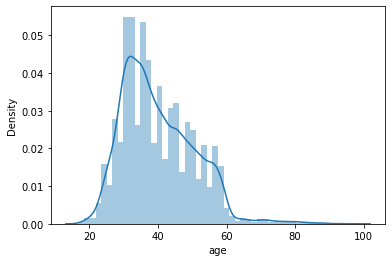

In [47]:
sns.distplot(df.age, hist=True)

<AxesSubplot:xlabel='age'>

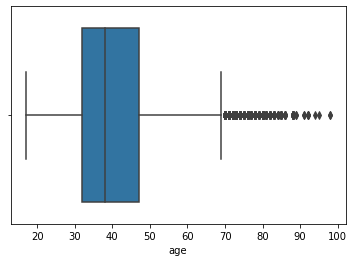

In [10]:
sns.boxplot(x='age',data=df)

In [11]:
df['marital'].describe()

count       37084
unique          4
top       married
freq        22479
Name: marital, dtype: object

Frequency Distribution Table of Marital Status on 'marital' variable

In [12]:
df1 = pd.value_counts(df['marital']).to_frame().reset_index()
df1.columns = ['Marital Status', 'Frequency']
print(df1)

  Marital Status  Frequency
0        married      22479
1         single      10407
2       divorced       4126
3        unknown         72


In [13]:
df['job'].describe()

count      37084
unique        12
top       admin.
freq        9420
Name: job, dtype: object

Frequency Distribution Table of Marital Status on 'marital' variable

In [14]:
df1 = pd.value_counts(df['job']).to_frame().reset_index()
df1.columns = ['Marital Status', 'Frequency']
print(df1)

   Marital Status  Frequency
0          admin.       9420
1     blue-collar       8314
2      technician       6096
3        services       3547
4      management       2637
5         retired       1541
6    entrepreneur       1309
7   self-employed       1276
8       housemaid        946
9      unemployed        925
10        student        767
11        unknown        306


Count Plot of Responses to the Campaign on 'y' variable

<AxesSubplot:xlabel='y', ylabel='count'>

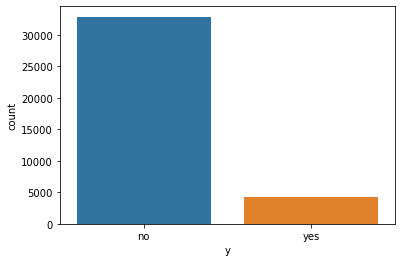

In [15]:
sns.countplot(x='y',data=df)

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

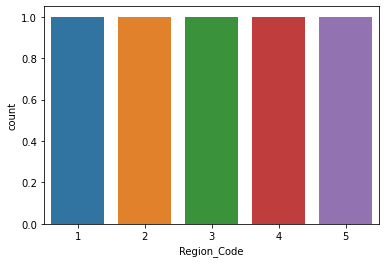

In [40]:
sns.countplot(x='Region_Code', data=reg_code_master)

### Bi-Variate Analysis

<AxesSubplot:xlabel='age', ylabel='campaign'>

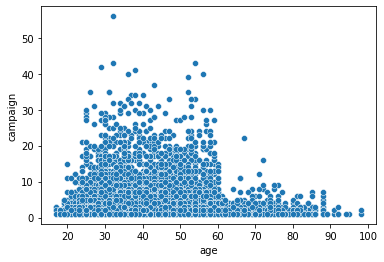

In [16]:
sns.scatterplot(x='age',y='campaign',data=df)

(Need one categ and one numeric variable for line chart)
https://www.saedsayad.com/bivariate_analysis.htm

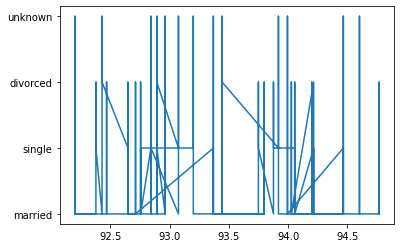

In [17]:
plt.plot(df['cons.price.idx'],df['marital'])
plt.show()

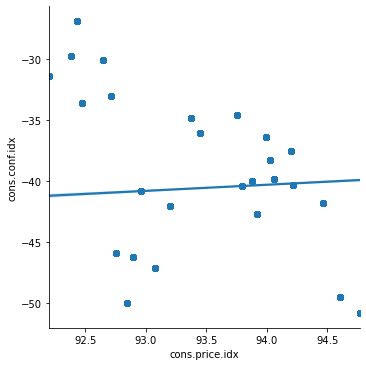

In [18]:
sns.lmplot(x='cons.price.idx',y='cons.conf.idx',data=df)

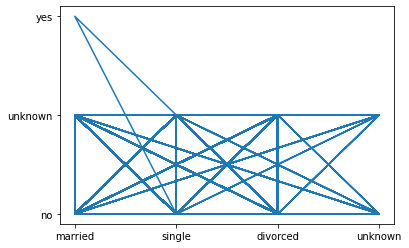

In [21]:
plt.plot(df['marital'],df['default'])
plt.show()

We don't know what this depicts. But it looks interesting!

<AxesSubplot:xlabel='default', ylabel='emp.var.rate'>

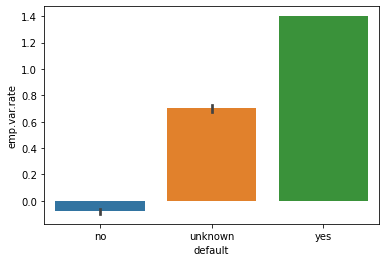

In [32]:
sns.barplot(x='default',y='emp.var.rate',data=df, )

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\iraghupathivasish\Anaconda3\lib\site

Text(0.5, 1.0, 'Analysis')

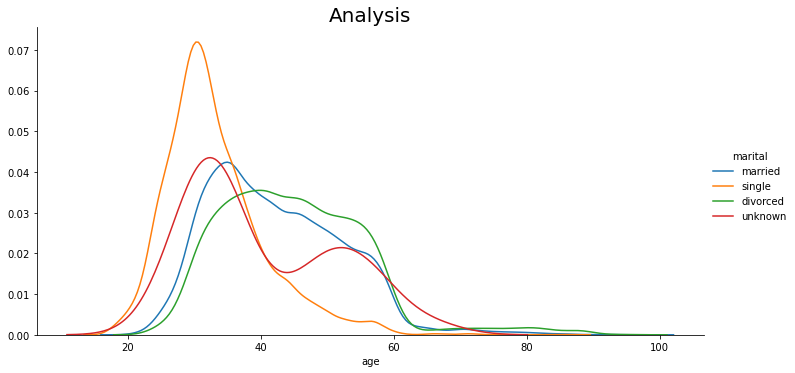

In [48]:
g=sns.FacetGrid(data=df,hue='marital',aspect=2,size=5)
g.map(sns.distplot,'age', hist=False)
g.add_legend()
g.ax.set_title('Analysis',size=20)
#g.ax.set_xlabel('Salary in $')
#g.ax.set_ylabel('Density')

### Z-Test for Bi-Variate Analysis (Doubt)

As per the website. But doubtful.

H0(Null Hypothesis): Population age mean is the same as the sample age mean.

H1(Alternate Hypothesis): Population age mean is not same as the sample age mean

In [29]:
from scipy import stats
from statsmodels.stats import weightstats as stests

In [30]:
s1=cust_and_bank_det.sample(frac=0.2)

In [31]:
ztest ,pval = stests.ztest(s1['age'],value=cust_and_bank_det["age"].mean())
print(float(pval))
if pval<0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

0.09187198573481081
Fail to Reject the Null Hypothesis


### Multi Variate Analysis

In [35]:
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,85254


C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


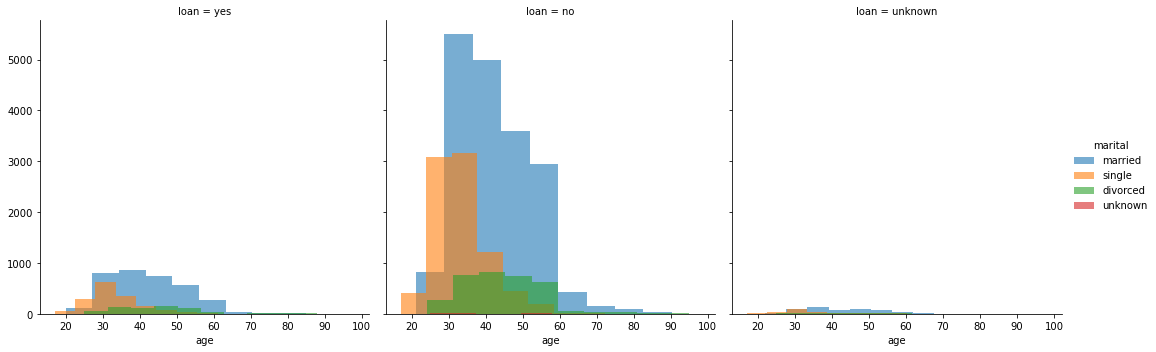

In [37]:
g=sns.FacetGrid(df,hue='marital',size=5,col='loan')
g.map(plt.hist,'age',alpha=0.6)
g.add_legend()

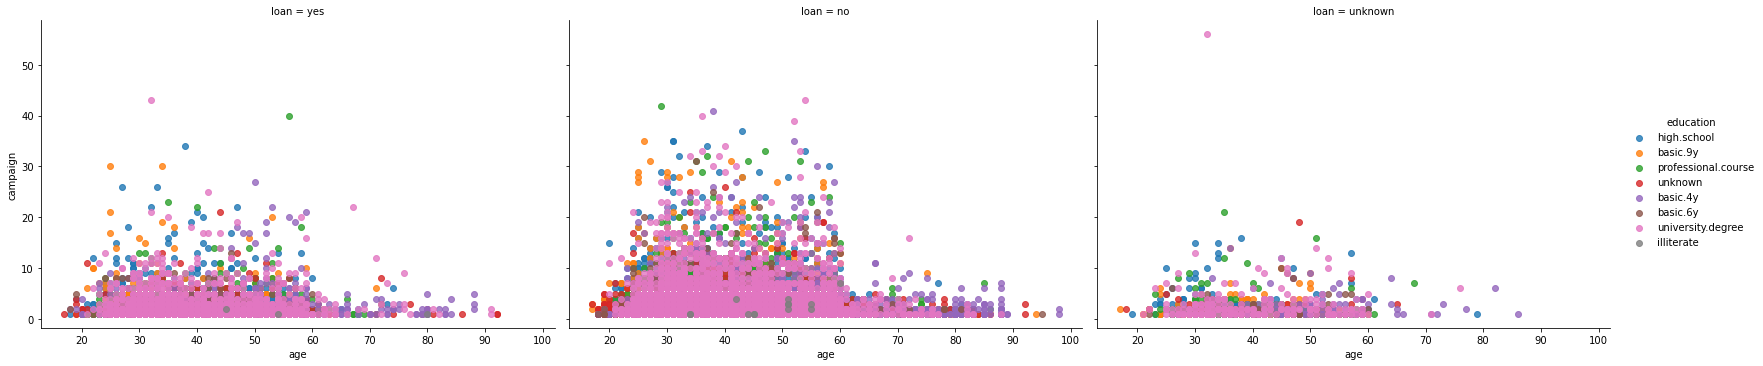

In [53]:
g=sns.lmplot(x='age',y='campaign',hue='education',data=df,aspect=1.5,col='loan',fit_reg=False)

## Missing values identification and treatment 

In [54]:
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,85254


In [55]:
df.shape

(37084, 26)

In [56]:
df.describe()

,Customer_id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664,55202.625553
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605,32057.300954
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1040.000000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,23223.000000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,56301.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,90008.000000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99301.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [58]:
df.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311


In [59]:
df.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,85254
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,...,999,1,failure,no,-1.1,94.767,-50.8,1.028,4963.6,79109


In [63]:
df.isna().any()

Customer_id       False
age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
Region_Code       False
State_Code        False
City_Code         False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
y                 False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
Postal Code       False
dtype: bool

In [70]:
df['Customer_id'].unique()

array([    1,     2,     3, ..., 37082, 37083, 37084], dtype=int64)

In [71]:
df['age'].unique()

array([56, 45, 59, 41, 24, 25, 29, 57, 35, 54, 46, 50, 39, 55, 37, 49, 34,
       52, 58, 32, 38, 44, 42, 40, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28,
       30, 27, 22, 26, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 80, 62, 63, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

#### Does 'unknown' need to be replaced/removed?

In [77]:
df['job'].unique()
df['job'].value_counts()

admin.           9420
blue-collar      8314
technician       6096
services         3547
management       2637
retired          1541
entrepreneur     1309
self-employed    1276
housemaid         946
unemployed        925
student           767
unknown           306
Name: job, dtype: int64

In [76]:
df['marital'].unique()
df['marital'].value_counts()

married     22479
single      10407
divorced     4126
unknown        72
Name: marital, dtype: int64

In [80]:
df['education'].unique()
df['education'].value_counts()

university.degree      10971
high.school             8542
basic.9y                5421
professional.course     4746
basic.4y                3765
basic.6y                2074
unknown                 1549
illiterate                16
Name: education, dtype: int64

In [82]:
df['default'].unique()
df['default'].value_counts()

no         29382
unknown     7700
yes            2
Name: default, dtype: int64

In [84]:
df['housing'].unique()
df['housing'].value_counts()

yes        19433
no         16769
unknown      882
Name: housing, dtype: int64

In [86]:
df['loan'].unique()
df['loan'].value_counts()

no         30561
yes         5641
unknown      882
Name: loan, dtype: int64

In [89]:
cust_camp_det

Customer_id  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome   
1            telephone  may    mon          307       1         999    0         nonexistent    1
24772        telephone  nov    fri          61        3         999    1         failure        1
24720        cellular   nov    fri          106       1         999    0         nonexistent    1
24721        cellular   nov    fri          50        2         999    0         nonexistent    1
24722        cellular   nov    fri          757       2         999    0         nonexistent    1
                                                                                               ..
12362        cellular   jul    thu          634       1         999    0         nonexistent    1
12363        cellular   jul    thu          144       1         999    0         nonexistent    1
12364        cellular   jul    thu          148       1         999    0         nonexistent    1
12365        cellular   j

In [102]:
cust_camp_det['poutcome'].value_counts()

nonexistent    32023
failure         3822
success         1239
Name: poutcome, dtype: int64

In [101]:
#df=df.drop(['pdays','poutcome'], axis=1)
# previous - to keep or not to keep? Relevant or no?